In [0]:
!pip install fastai==0.7.0

    100% |████████████████████████████████| 122kB 4.3MB/s 
    100% |████████████████████████████████| 122kB 5.0MB/s 
    100% |████████████████████████████████| 112kB 5.0MB/s 
    100% |████████████████████████████████| 1.5MB 8.3MB/s 
    100% |████████████████████████████████| 61kB 16.9MB/s 
    100% |████████████████████████████████| 184kB 11.3MB/s 
    100% |████████████████████████████████| 2.2MB 11.4MB/s 
    100% |████████████████████████████████| 71kB 21.0MB/s 
    100% |████████████████████████████████| 3.6MB 11.0MB/s 
    100% |████████████████████████████████| 496.4MB 24kB/s 
    100% |████████████████████████████████| 11.6MB 3.3MB/s 
    100% |████████████████████████████████| 92kB 25.7MB/s 
    100% |████████████████████████████████| 122kB 30.2MB/s 
    100% |████████████████████████████████| 61kB 21.6MB/s 
    100% |████████████████████████████████| 81kB 18.2MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /root/.cache/pip/wheels

In [0]:
!pip install torchtext==0.2.3

    100% |████████████████████████████████| 51kB 2.3MB/s 
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [0]:
!wget 'http://files.fast.ai/data/dogscats.zip'

--2018-11-17 19:59:19--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M   102MB/s    in 8.2s    

2018-11-17 19:59:28 (100 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [0]:
import zipfile

zip_ref = zipfile.ZipFile('dogscats.zip', 'r')
zip_ref.extractall('sample_data/data')
zip_ref.close()


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
PATH = "sample_data/data/dogscats/"
sz=224

In [0]:
torch.cuda.is_available()

True

In [0]:
torch.backends.cudnn.enabled


True

In [0]:
os.listdir(PATH)

['train', 'test1', 'sample', 'valid', 'models']

In [0]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [0]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.4050.jpg',
 'cat.1345.jpg',
 'cat.6314.jpg',
 'cat.12100.jpg',
 'cat.6491.jpg']

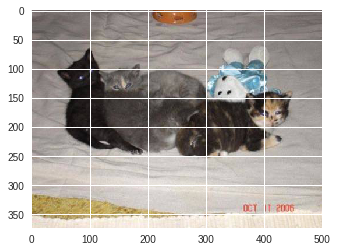

In [0]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [0]:
img.shape

(374, 500, 3)

In [0]:
img[:4,:4, 1]

array([[100, 102, 104, 107],
       [103, 105, 107, 109],
       [107, 109, 111, 113],
       [111, 112, 114, 115]], dtype=uint8)

In [0]:
??ImageClassifierData

In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 23260412.82it/s]


100%|██████████| 32/32 [00:15<00:00,  2.06it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.043135   0.027514   0.991     
    1      0.041154   0.030189   0.989     



[array([0.03019]), 0.989]

In [0]:
# This is the label for a val data
data.val_y


array([0, 0, 0, ..., 1, 1, 1])

In [0]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [0]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [0]:


log_preds[:10]



array([[ -0.00191,  -6.26016],
       [ -0.00007,  -9.5791 ],
       [ -0.00007,  -9.56165],
       [ -0.00003, -10.35149],
       [ -0.00501,  -5.2983 ],
       [ -0.10539,  -2.30236],
       [ -0.00015,  -8.78375],
       [ -0.     , -14.17254],
       [ -0.00066,  -7.31879],
       [ -0.00002, -10.62605]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:


def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')



Correctly classified


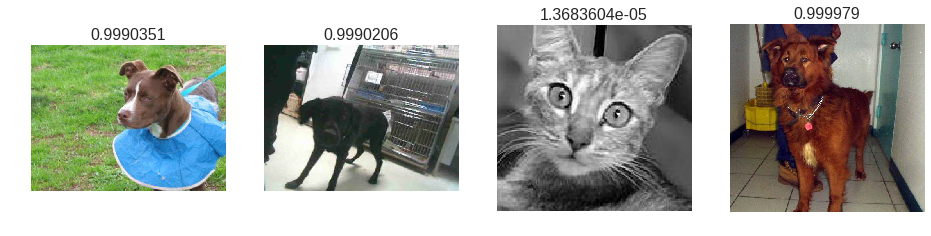

In [0]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


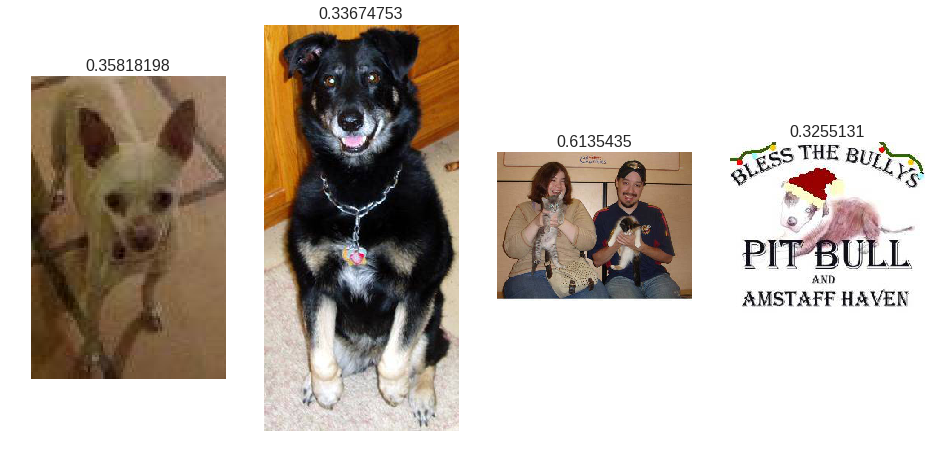

In [0]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:


def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)



Most correct cats


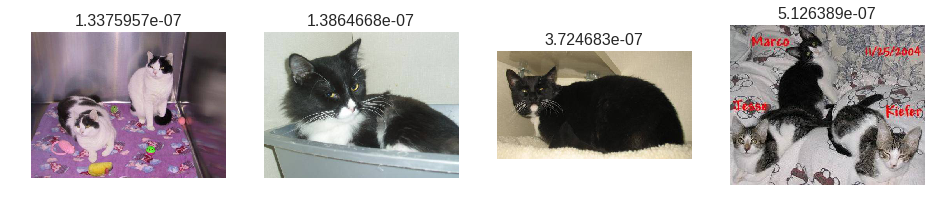

In [0]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


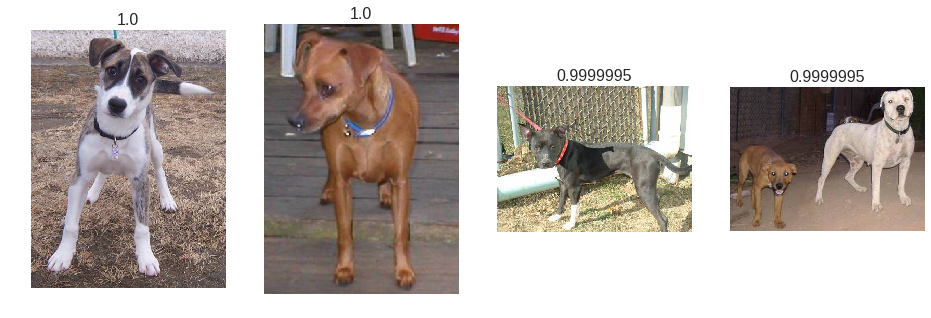

In [0]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


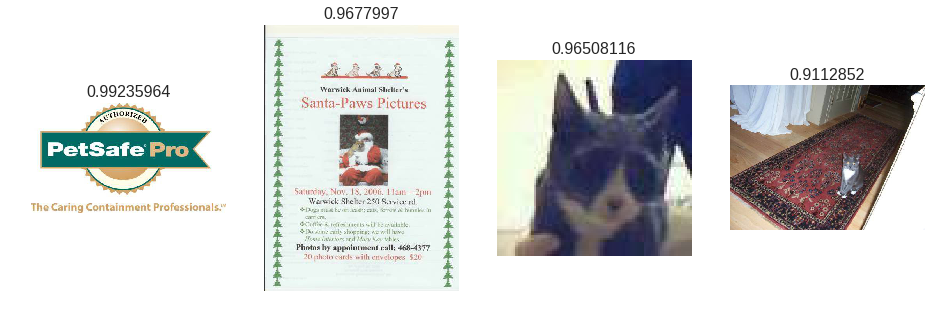

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


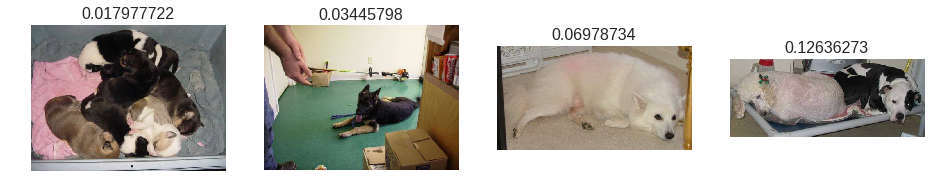

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


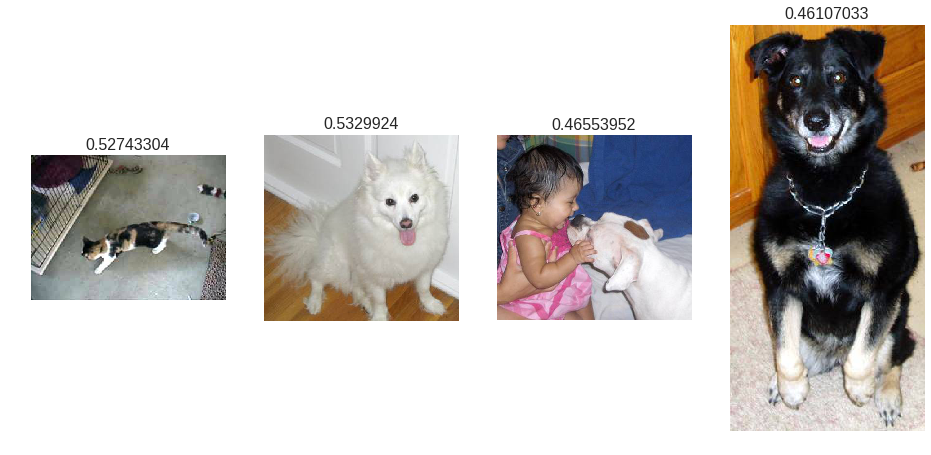

In [0]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
lrf=learn.lr_find()

 85%|████████▌ | 307/360 [00:07<00:01, 52.19it/s, loss=0.445]


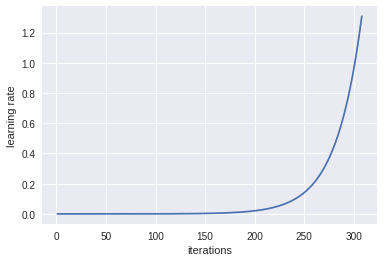

In [0]:
learn.sched.plot_lr()

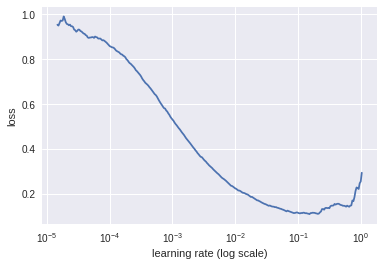

In [0]:
learn.sched.plot()

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

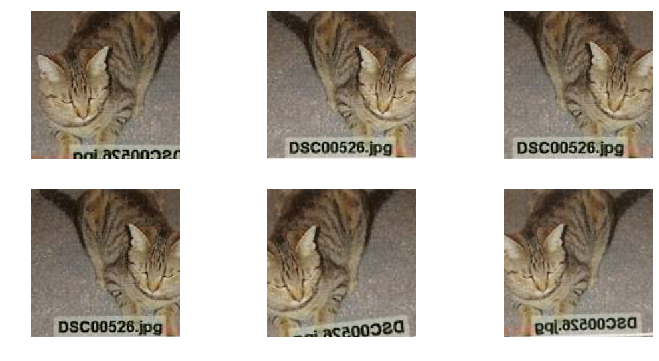

In [0]:


plots(ims, rows=2)



In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.052582   0.029697   0.988     



[array([0.0297]), 0.988]

In [0]:
learn.precompute=False

In [0]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.046278   0.025087   0.991     
    1      0.036909   0.026559   0.99      
    2      0.041072   0.027136   0.9895    



[array([0.02714]), 0.9895]

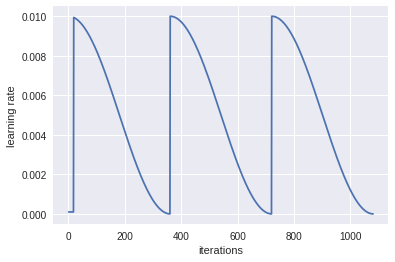

In [0]:
learn.sched.plot_lr()

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

In [0]:
learn.unfreeze()

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [0]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.052109   0.026637   0.9885    
    1      0.041876   0.022802   0.9905    
    2      0.037456   0.02162    0.99      
    3      0.03413    0.022352   0.9915    
    4      0.027783   0.02183    0.992     
    5      0.021595   0.024325   0.9905    
    6      0.01851    0.021337   0.9925    



[array([0.02134]), 0.9925]

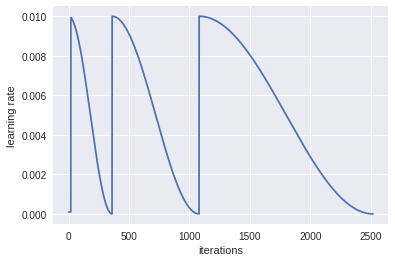

In [0]:
learn.sched.plot_lr()

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

In [0]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [0]:
accuracy_np(probs, y)

0.9945


Confusion matrix¶


In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[995   5]
 [  6 994]]


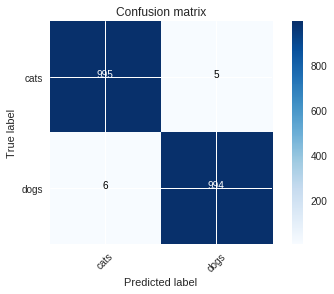

In [0]:
plot_confusion_matrix(cm, data.classes)

Most incorrect cats


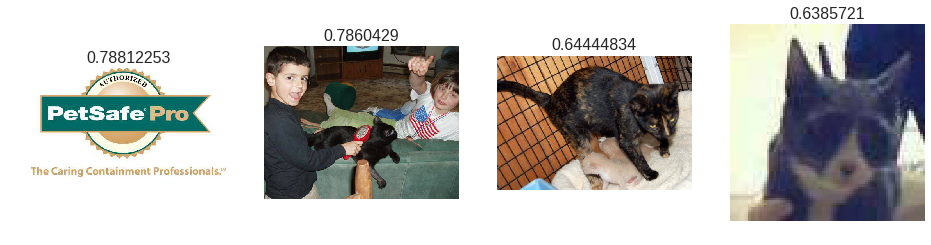

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


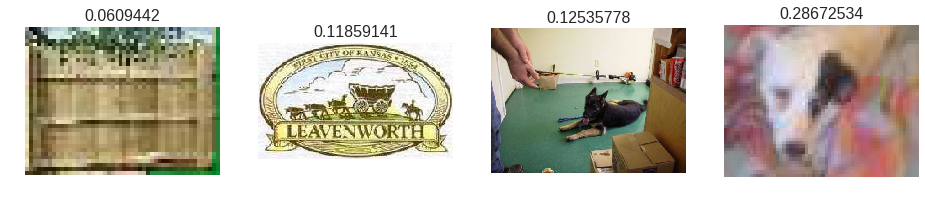

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")